# PKS1510-089 analysis notebook
Reference paper: https://www.aanda.org/articles/aa/pdf/2011/05/aa16128-10.pdf

In [1]:
from agilepy.api.AGAnalysis import AGAnalysis

In [ ]:
# Interactive plots
#%matplotlib widget

## Creating a configuration file

In [2]:
confFilePath = "$HOME/agilepy_conf.yaml"

In [3]:
AGAnalysis.getConfiguration(
    confFilePath = confFilePath,
    evtfile=None,
    logfile=None,
    userName = "username",
    sourceName = "PKS1510-089",
    tmin = 54891,
    tmax = 54921,
    timetype = "MJD",
    glon = 351.29,
    glat = 40.13,
    outputDir = "$HOME/agilepy_analysis",
    verboselvl = 0,
    userestapi=True,
    datapath="$HOME/agile_dataset"
)

## Obtaining the AGAnalysis object

In [4]:
ag = AGAnalysis(confFilePath)

In [5]:
ag.setOptions(binsize=0.5)

In [6]:
#print all options of the configuration file
ag.printOptions()

{ 'ap': {'radius': 3, 'timeslot': 3600},
  'input': { 'datapath': '/home/antonio/agile_dataset',
             'evtfile': PosixPath('/home/antonio/agile_dataset/EVT.index'),
             'logfile': PosixPath('/home/antonio/agile_dataset/LOG.index'),
             'userestapi': True},
  'maps': { 'binsize': 0.5,
            'energybins': [[100, 10000]],
            'expstep': 4.0,
            'fovbinnumber': 1,
            'mapsize': 40,
            'offaxisangle': 30,
            'proj': 'ARC',
            'projtype': 'WCS',
            'spectralindex': 2.1,
            'timestep': 160,
            'useEDPmatrixforEXP': False},
  'mle': { 'contourpoints': 40,
           'edpcorrection': 0.75,
           'expratio_maxthr': 15,
           'expratio_minthr': 0,
           'expratio_size': 10,
           'expratioevaluation': True,
           'fluxcorrection': 0,
           'integratortype': 1,
           'loccl': 5.99147,
           'mindefaulttolerance': 0.01,
           'minimizeralg': 'M

## Sources hypothesis

In [7]:
#sources = ag.loadSourcesFromCatalog("2AGL", rangeDist = (0, 5), show=True)

#aggiungeto una sorgente in questo modo non funziona più il selectSources
newSourceDict = {
    "glon" : 351.29,
    "glat": 40.13,
    "spectrumType" : "PowerLaw",
    "flux": 2.0e-07,
    "index": 2.1
}
newSource = ag.addSource("PKS1510-089", newSourceDict)

## Selecting sources

In [8]:
sources = ag.selectSources("flux > 0", show = True)


-----------------------------------------------------------
 Source name: PKS1510-089 (PointSource)
  * Spectrum type: PowerLaw
  * Free parameters: none
  * Initial source parameters:
	- flux (ph/cm2s): 2.0000e-07
	- index : 2.1
	- Source position (l,b): (351.29, 40.13)
	- Distance from map center (deg): 0.0


## Free a source's parameter
Freeable params = [flux, index, index1, index2, cutoffEnergy, pivotEnergy, curvature, pos]

In [9]:
affectedSources = ag.freeSources('name == "PKS1510-089"', "flux", True, show=True)


-----------------------------------------------------------
 Source name: PKS1510-089 (PointSource)
  * Spectrum type: PowerLaw
  * Free parameters: flux
  * Initial source parameters:
	- flux (ph/cm2s): 2.0000e-07
	- index : 2.1
	- Source position (l,b): (351.29, 40.13)
	- Distance from map center (deg): 0.0


In this example, only one source is affected.

## Analysis

In [10]:
#Generate maps
maplistfile = ag.generateMaps()

2022-02-09 10:39:02,585 [WARNING ] [AGDataset] Query file /home/antonio/agile_dataset/EVT.qfile does not exists
2022-02-09 10:39:02,586 [WARNING ] [AGDataset] Query file /home/antonio/agile_dataset/LOG.qfile does not exists


100%|██████████| 33/33 [00:31<00:00,  1.03it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating plot..please wait.
2022-02-09 10:41:56,808 [WARNING ] [AGAnalysis] singleMode has been turned off because only one map is going to be displayed.


/home/antonio/anaconda3/envs/agilepydev/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:458: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  super().draw(renderer, inframe=inframe)
/home/antonio/anaconda3/envs/agilepydev/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:458: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  super().draw(renderer, inframe=inframe)


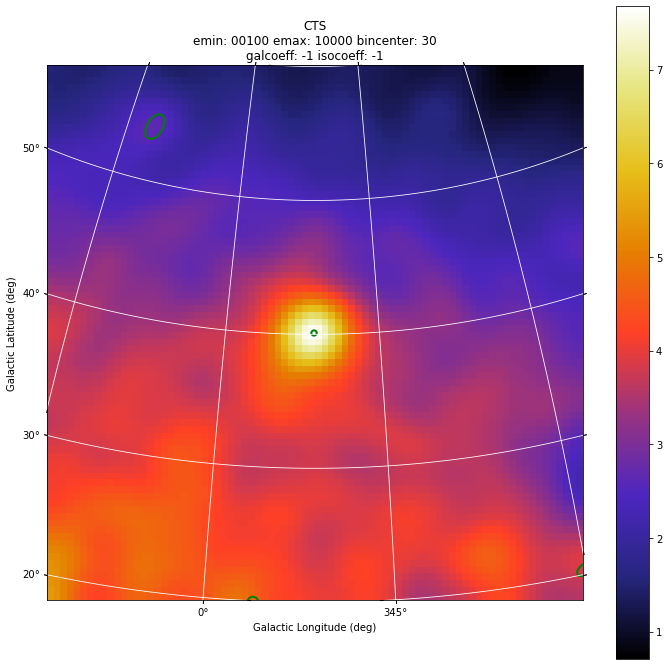

[None]

In [11]:
#Display counts map
ag.displayCtsSkyMaps(maplistFile=maplistfile, smooth=3, catalogRegions="2AGL", catalogRegionsColor="green")

In [12]:
#Fix the diffuse emission coefficient to a default value. 
ag.setOptions(galcoeff=[0.7])

In [13]:
ag.printOptions("model")

{ 'emax_sources': 10000,
  'emin_sources': 100,
  'galcoeff': [0.7],
  'galmode': 1,
  'galmode2': 0,
  'galmode2fit': 0,
  'isocoeff': [-1],
  'isomode': 1,
  'isomode2': 0,
  'isomode2fit': 0,
  'modelfile': None}


In [14]:
#Perform a maximum likelihood estimator
ag.mle()

['/home/antonio/agilepy_analysis/username_PKS1510-089_20220209-103851/mle/0/analysis_product_PKS1510-089.source']

In [15]:
#Display the results
ag.selectSources("sqrtTS > 0", show=True)


-----------------------------------------------------------
 Source name: PKS1510-089 (PointSource) => sqrt(ts): 19.8115
  * Spectrum type: PowerLaw
  * Free parameters: flux
  * Initial source parameters:
	- flux (ph/cm2s): 2.0000e-07
	- index : 2.1
	- Source position (l,b): (351.29, 40.13)
	- Distance from map center (deg): 0.0
  * Last MLE analysis (2022-02-09 10:42:07.499253):
	- flux (ph/cm2s): 1.7293e-06 +/- 1.2311e-07
	- index : 2.1 +/- 0
	- upper limit(ph/cm2s): 1.98248e-06
	- ergLog(erg/cm2s): 2.79476e-10 +/- 1.98972e-11
	- galCoeff: [0.7]
	- isoCoeff: [11.0349] +/- [0.367294]
	- exposure(cm2s): 358153000.0
	- exp-ratio: 0
	- L_peak: 351.29
	- B_peak: 40.13
	- Distance from start pos: 0
	- position:
	    - L: -1
	    - B: -1
	    - Distance from start pos: -1
	    - radius of circle: -1
	    - ellipse:
		  - a: -1
		  - b: -1
		  - phi: -1
-----------------------------------------------------------


## Spectral index evaluation

In [16]:
#energybin=2 to calcolate spectral index
ag.setOptionEnergybin(2)
ag.setOptions(galcoeff=[0.7, 0.7, 0.7, 0.7])
ag.setOptions(isocoeff=[-1, -1, -1, -1])

In [17]:
maplistfile = ag.generateMaps()

100%|██████████| 33/33 [00:00<00:00, 41440.73it/s]


Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating plot..please wait.


/home/antonio/anaconda3/envs/agilepydev/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:458: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  super().draw(renderer, inframe=inframe)
/home/antonio/anaconda3/envs/agilepydev/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:458: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  super().draw(renderer, inframe=inframe)
/home/antonio/anaconda3/envs/agilepydev/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:458: MatplotlibDeprecationWarning: 
The 'inframe' pa

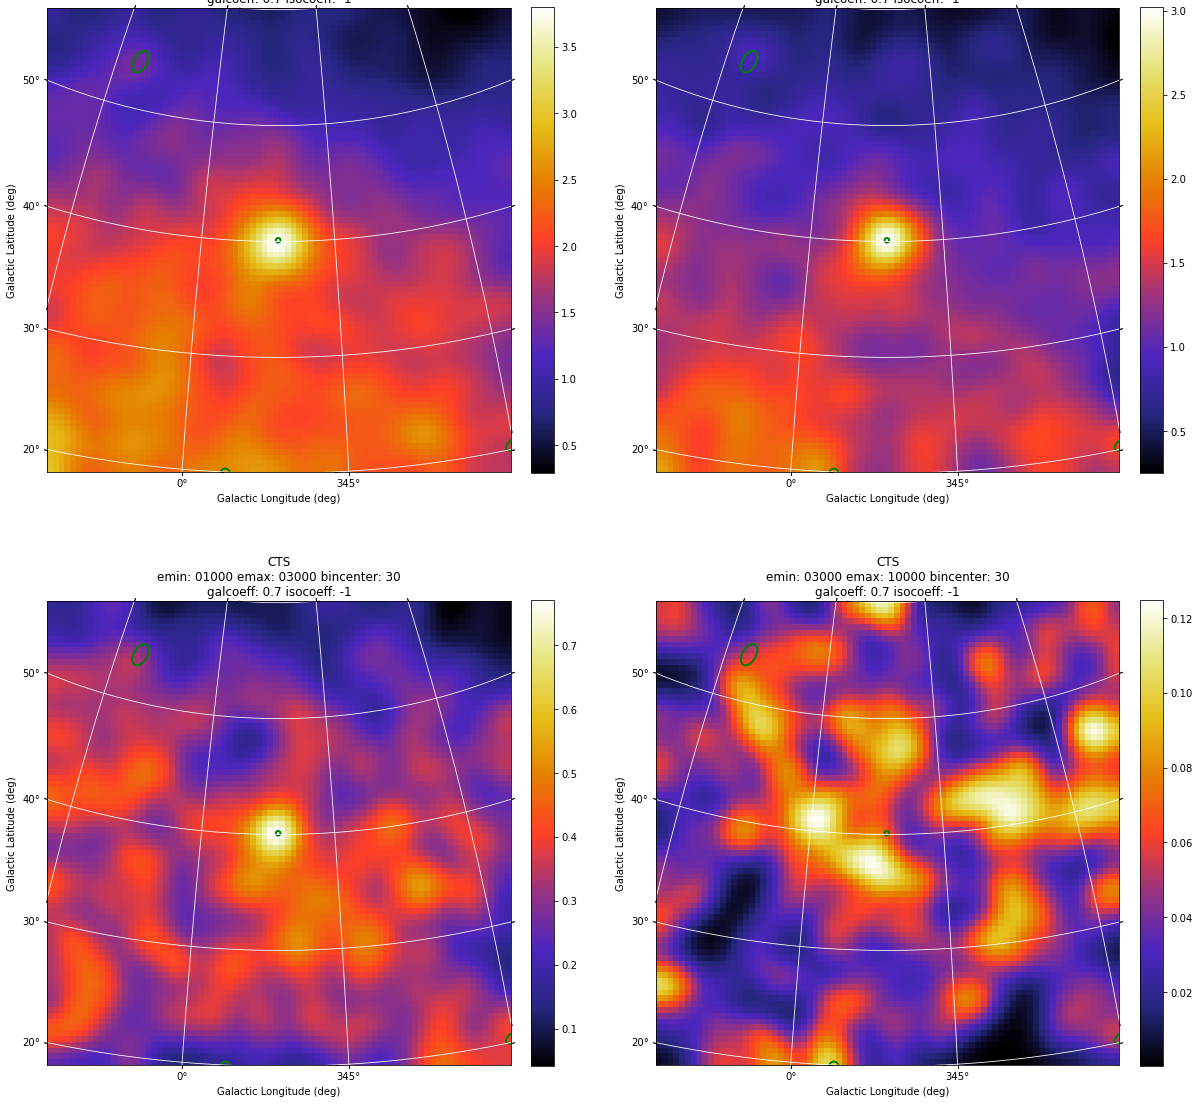

[None]

In [18]:
ag.displayCtsSkyMaps(maplistFile=maplistfile, smooth=3, normType="power", catalogRegions="2AGL", catalogRegionsColor="green")

In [19]:
affectedSources = ag.freeSources('name == "PKS1510-089"', "index", True, show=True)


-----------------------------------------------------------
 Source name: PKS1510-089 (PointSource) => sqrt(ts): 19.8115
  * Spectrum type: PowerLaw
  * Free parameters: flux index
  * Initial source parameters:
	- flux (ph/cm2s): 2.0000e-07
	- index : 2.1
	- Source position (l,b): (351.29, 40.13)
	- Distance from map center (deg): 0.0
  * Last MLE analysis (2022-02-09 10:42:07.499253):
	- flux (ph/cm2s): 1.7293e-06 +/- 1.2311e-07
	- index : 2.1 +/- 0
	- upper limit(ph/cm2s): 1.98248e-06
	- ergLog(erg/cm2s): 2.79476e-10 +/- 1.98972e-11
	- galCoeff: [0.7]
	- isoCoeff: [11.0349] +/- [0.367294]
	- exposure(cm2s): 358153000.0
	- exp-ratio: 0
	- L_peak: 351.29
	- B_peak: 40.13
	- Distance from start pos: 0
	- position:
	    - L: -1
	    - B: -1
	    - Distance from start pos: -1
	    - radius of circle: -1
	    - ellipse:
		  - a: -1
		  - b: -1
		  - phi: -1
-----------------------------------------------------------


In [20]:
ag.mle()

['/home/antonio/agilepy_analysis/username_PKS1510-089_20220209-103851/mle/1/analysis_product_PKS1510-089.source']

In [21]:
selectedSources = ag.selectSources('flux > 0', show=True)


-----------------------------------------------------------
 Source name: PKS1510-089 (PointSource) => sqrt(ts): 20.0815
  * Spectrum type: PowerLaw
  * Free parameters: flux index
  * Initial source parameters:
	- flux (ph/cm2s): 1.7293e-06 +/- 1.2311e-07
	- index : 2.1 +/- 0
	- Source position (l,b): (351.29, 40.13)
	- Distance from map center (deg): 0.0
  * Last MLE analysis (2022-02-09 10:47:41.262727):
	- flux (ph/cm2s): 1.6004e-06 +/- 6.9527e-316
	- index : 2.1 +/- 6.92852e-310
	- upper limit(ph/cm2s): 1.83745e-06
	- ergLog(erg/cm2s): 2.58642e-10 +/- 1.12365e-319
	- galCoeff: [0.7, 0.7, 0.7, 0.7]
	- isoCoeff: [6.02924, 3.10287, 0.877702, 0.103418] +/- [0.314041, 0.158983, 0.0577251, 0.0235669]
	- exposure(cm2s): 358153000.0
	- exp-ratio: 0
	- L_peak: 351.29
	- B_peak: 40.13
	- Distance from start pos: 0
	- position:
	    - L: -1
	    - B: -1
	    - Distance from start pos: -1
	    - radius of circle: -1
	    - ellipse:
		  - a: -1
		  - b: -1
		  - phi: -1
----------------------

In [22]:
ag.setOptionEnergybin(0)
ag.setOptions(galcoeff=[0.7])
affectedSources = ag.freeSources('name == "PKS1510-089"', "index", False, show=True)


-----------------------------------------------------------
 Source name: PKS1510-089 (PointSource) => sqrt(ts): 20.0815
  * Spectrum type: PowerLaw
  * Free parameters: flux
  * Initial source parameters:
	- flux (ph/cm2s): 1.7293e-06 +/- 1.2311e-07
	- index : 2.1 +/- 0
	- Source position (l,b): (351.29, 40.13)
	- Distance from map center (deg): 0.0
  * Last MLE analysis (2022-02-09 10:47:41.262727):
	- flux (ph/cm2s): 1.6004e-06 +/- 6.9527e-316
	- index : 2.1 +/- 6.92852e-310
	- upper limit(ph/cm2s): 1.83745e-06
	- ergLog(erg/cm2s): 2.58642e-10 +/- 1.12365e-319
	- galCoeff: [0.7, 0.7, 0.7, 0.7]
	- isoCoeff: [6.02924, 3.10287, 0.877702, 0.103418] +/- [0.314041, 0.158983, 0.0577251, 0.0235669]
	- exposure(cm2s): 358153000.0
	- exp-ratio: 0
	- L_peak: 351.29
	- B_peak: 40.13
	- Distance from start pos: 0
	- position:
	    - L: -1
	    - B: -1
	    - Distance from start pos: -1
	    - radius of circle: -1
	    - ellipse:
		  - a: -1
		  - b: -1
		  - phi: -1
----------------------------

### Light curve with default tmin and tmax

In [23]:
lightCurveData1 = ag.lightCurveMLE("PKS1510-089", binsize=86400)

Computing light curve bins..please wait.


100%|██████████| 33/33 [00:00<00:00, 102300.10it/s]


Temporal bin loop:   0%|          | 0/30 [00:00<?, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

100%|██████████| 3/3 [00:00<00:00, 7049.25it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

In [24]:
cat $lightCurveData1

time_start_mjd time_end_mjd sqrt(ts) flux flux_err flux_ul gal gal_error iso iso_error l_peak b_peak dist_peak l b r ell_dist a b phi exposure ExpRatio counts counts_err Index Index_Err Par2 Par2_Err Par3 Par3_Err Erglog Erglog_Err Erglog_UL time_start_utc time_end_utc time_start_tt time_end_tt Fix index ULConfidenceLevel SrcLocConfLevel start_l start_b start_flux typefun par2 par3 galmode2 galmode2fit isomode2 isomode2fit edpcor fluxcor integratortype expratioEval expratio_minthr expratio_maxthr expratio_size Emin emax fovmin fovmax albedo binsize expstep phasecode fit_cts fit_fitstatus0 fit_fcn0 fit_edm0 fit_nvpar0 fit_nparx0 fit_iter0 fit_fitstatus1 fit_fcn1 fit_edm1 fit_nvpar1 fit_nparx1 fit_iter1 fit_Likelihood1
54891.0 54892.0 0 0 29.5442e-08 65.4286e-08 0.7 0 10.5789 0.000729189 351.29 40.13 0 -1 -1 -1 -1 -1 -1 -1 15327000.0 0 0 4.52825 2.1 0 0 0 0 0 0 4.77481e-11 1.05743e-10 2009-03-01T00:00:00.000 2009-03-02T00:00:00.000 162950400.0 163036800.0 1 2.1 2 5.99147 351.29 40.13 1.6

In [25]:
print(lightCurveData1)

/home/antonio/agilepy_analysis/username_PKS1510-089_20220209-103851/lc/0/light_curve_162950400_165542400.txt


In [26]:
ag.displayLightCurve("mle")

Generating plot..please wait.


In [27]:
affectedSources = ag.freeSources('name == "PKS1510-089"', "pos", True, show=True)
lightCurveData1 = ag.lightCurveMLE("PKS1510-089", binsize=86400)


-----------------------------------------------------------
 Source name: PKS1510-089 (PointSource) => sqrt(ts): 20.0815
  * Spectrum type: PowerLaw
  * Free parameters: flux pos
  * Initial source parameters:
	- flux (ph/cm2s): 1.7293e-06 +/- 1.2311e-07
	- index : 2.1 +/- 0
	- Source position (l,b): (351.29, 40.13)
	- Distance from map center (deg): 0.0
  * Last MLE analysis (2022-02-09 10:47:41.262727):
	- flux (ph/cm2s): 1.6004e-06 +/- 6.9527e-316
	- index : 2.1 +/- 6.92852e-310
	- upper limit(ph/cm2s): 1.83745e-06
	- ergLog(erg/cm2s): 2.58642e-10 +/- 1.12365e-319
	- galCoeff: [0.7, 0.7, 0.7, 0.7]
	- isoCoeff: [6.02924, 3.10287, 0.877702, 0.103418] +/- [0.314041, 0.158983, 0.0577251, 0.0235669]
	- exposure(cm2s): 358153000.0
	- exp-ratio: 0
	- L_peak: 351.29
	- B_peak: 40.13
	- Distance from start pos: 0
	- position:
	    - L: -1
	    - B: -1
	    - Distance from start pos: -1
	    - radius of circle: -1
	    - ellipse:
		  - a: -1
		  - b: -1
		  - phi: -1
------------------------

100%|██████████| 33/33 [00:00<00:00, 98513.90it/s]


Temporal bin loop:   0%|          | 0/30 [00:00<?, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

100%|██████████| 3/3 [00:00<00:00, 3167.90it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

In [28]:
ag.displayLightCurve("mle")

Generating plot..please wait.


In [29]:
lightCurveData4 = ag.lightCurveMLE("PKS1510-089", binsize=86400*4)

Computing light curve bins..please wait.


100%|██████████| 33/33 [00:00<00:00, 50203.86it/s]


Temporal bin loop:   0%|          | 0/8 [00:00<?, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

2022-02-09 11:10:08,819 [WARNING ] [AGAnalysis] [LC] The last bin [165369600, 165715200] of the light curve analysis falls outside the range of the available data [.. , 165585534.0]. The binsize is reduced to 215934.0 seconds, the new bin is [165369600, 165585534.0]


100%|██████████| 4/4 [00:00<00:00, 11975.17it/s]

Generating maps..please wait.


Fov bins loop:   0%|          | 0/1 [00:00<?, ?it/s]

Energy bins loop: 0it [00:00, ?it/s]

In [30]:
ag.displayLightCurve("mle")

Generating plot..please wait.


In [31]:
ag.selectSources('name == "PKS1510-089"', show=True)


-----------------------------------------------------------
 Source name: PKS1510-089 (PointSource) => sqrt(ts): 20.0815
  * Spectrum type: PowerLaw
  * Free parameters: flux pos
  * Initial source parameters:
	- flux (ph/cm2s): 1.7293e-06 +/- 1.2311e-07
	- index : 2.1 +/- 0
	- Source position (l,b): (351.29, 40.13)
	- Distance from map center (deg): 0.0
  * Last MLE analysis (2022-02-09 10:47:41.262727):
	- flux (ph/cm2s): 1.6004e-06 +/- 6.9527e-316
	- index : 2.1 +/- 6.92852e-310
	- upper limit(ph/cm2s): 1.83745e-06
	- ergLog(erg/cm2s): 2.58642e-10 +/- 1.12365e-319
	- galCoeff: [0.7, 0.7, 0.7, 0.7]
	- isoCoeff: [6.02924, 3.10287, 0.877702, 0.103418] +/- [0.314041, 0.158983, 0.0577251, 0.0235669]
	- exposure(cm2s): 358153000.0
	- exp-ratio: 0
	- L_peak: 351.29
	- B_peak: 40.13
	- Distance from start pos: 0
	- position:
	    - L: -1
	    - B: -1
	    - Distance from start pos: -1
	    - radius of circle: -1
	    - ellipse:
		  - a: -1
		  - b: -1
		  - phi: -1
------------------------

time_start_mjd time_end_mjd sqrt(ts) flux flux_err flux_ul gal gal_error iso iso_error l_peak b_peak dist_peak l b r ell_dist a b phi exposure ExpRatio counts counts_err Index Index_Err Par2 Par2_Err Par3 Par3_Err Erglog Erglog_Err Erglog_UL time_start_utc time_end_utc time_start_tt time_end_tt Fix index ULConfidenceLevel SrcLocConfLevel start_l start_b start_flux typefun par2 par3 galmode2 galmode2fit isomode2 isomode2fit edpcor fluxcor integratortype expratioEval expratio_minthr expratio_maxthr expratio_size Emin emax fovmin fovmax albedo binsize expstep phasecode

In [32]:
ag.displayGenericColumns(lightCurveData4, ["ExpRatio"], um=[""])

## Cleaning up

In [33]:
ag.deleteAnalysisDir()

True

# 

##### 